In [45]:
# Import Dependencies
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.style as style

# Read the CSV into a Pandas DataFrame
intake_csv = "Resources/Austin_Animal_Center_Intakes.csv"
outcome_csv= "Resources/Austin_Animal_Center_Outcomes.csv"

intake_df = pd.read_csv(intake_csv)
outcome_df = pd.read_csv(outcome_csv)

#convert date variable to datetime format

intake_df['DateTime'] = pd.to_datetime(intake_df['DateTime']).dt.date
outcome_df['DateTime'] = pd.to_datetime(outcome_df['DateTime']).dt.date

#update intake file with column reflecting number of intakes
#and select outcomes for animals with 1 or 2 intakes
intake_counts=intake_df.groupby(['Animal ID']).size().reset_index(name='counts')
intake_df=pd.merge(intake_df, intake_counts, on="Animal ID", how="outer")
reduced_intake_df=intake_df.query('counts <3')

#update outtake file with column reflecting number of intakes per animal
#and select outcomes for animals with 1 or 2 intakes
outcome_df=pd.merge(outcome_df, intake_counts, on="Animal ID", how="left")
reduced_outcome_df=outcome_df.query('counts <3')
#reduced_outcome_df=reduced_outcome_df.drop(columns=['counts'])



In [2]:
outcome_df.dtypes

Animal ID            object
Name                 object
DateTime             object
MonthYear            object
Date of Birth        object
Outcome Type         object
Outcome Subtype      object
Animal Type          object
Sex upon Outcome     object
Age upon Outcome     object
Breed                object
Color                object
counts              float64
dtype: object

In [3]:
reduced_outcome_df

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color,counts
0,A741715,*Pebbles,2017-01-11,01/11/2017 06:17:00 PM,03/07/2016,Adoption,NaN,Cat,Spayed Female,10 months,Domestic Shorthair Mix,Calico,1.0
1,A658751,Benji,2016-11-13,11/13/2016 01:38:00 PM,07/14/2011,Return to Owner,NaN,Dog,Neutered Male,5 years,Border Terrier Mix,Tan,2.0
2,A721285,NaN,2016-02-24,02/24/2016 02:42:00 PM,02/24/2014,Euthanasia,Suffering,Other,Unknown,2 years,Raccoon Mix,Black/Gray,1.0
3,A707443,NaN,2015-07-13,07/13/2015 01:50:00 PM,06/21/2015,Transfer,Partner,Cat,Intact Female,3 weeks,Domestic Longhair Mix,Black Smoke,1.0
4,A684346,NaN,2014-07-22,07/22/2014 04:04:00 PM,07/07/2014,Transfer,Partner,Cat,Intact Male,2 weeks,Domestic Shorthair Mix,Orange Tabby,1.0
5,A666430,Lucy,2013-11-07,11/07/2013 11:47:00 AM,11/06/2012,Transfer,Partner,Dog,Spayed Female,1 year,Beagle Mix,White/Brown,1.0
6,A675708,*Johnny,2014-06-03,06/03/2014 02:20:00 PM,03/31/2013,Adoption,NaN,Dog,Neutered Male,1 year,Pit Bull,Blue/White,1.0
7,A680386,Monday,2014-06-15,06/15/2014 03:50:00 PM,06/02/2005,Transfer,Partner,Dog,Neutered Male,9 years,Miniature Schnauzer Mix,White,1.0
8,A683115,NaN,2014-07-07,07/07/2014 02:04:00 PM,01/07/2014,Euthanasia,Rabies Risk,Other,Unknown,5 months,Bat Mix,Brown,1.0
9,A713785,NaN,2015-10-19,10/19/2015 02:55:00 PM,05/29/2015,Transfer,Partner,Dog,Neutered Male,4 months,Labrador Retriever Mix,Red,1.0


In [4]:
#now take single intake animals and match with any available outcome
reduced_intake_only_one_df=reduced_intake_df.query('counts <2')
#reduced_intake_only_one_df=reduced_intake_only_one_df.add_prefix('IN_')
reduced_outcome_df=reduced_outcome_df.add_prefix("OUT_")

reduced_intake_only_one_df=reduced_intake_only_one_df.rename(index=str,columns={"IN_Animal ID": "Animal ID"})
reduced_outcome_df=reduced_outcome_df.rename(index=str,columns={"OUT_Animal ID": "Animal ID"})
one_intake_merged=pd.merge(reduced_intake_only_one_df, reduced_outcome_df, on="Animal ID", how="left")

In [5]:
one_intake_merged["num_of_intakes_for_ID"]=1

In [6]:
#now take two intake animals and figure out order of intakes and outcomes
reduced_intake_two_df=reduced_intake_df.query('counts !=1')


In [7]:
reduced_intake_two_first_date_lookup_df=reduced_intake_two_df.groupby('Animal ID').aggregate(['min']).reset_index()
reduced_intake_two_first_date_lookup_df = reduced_intake_two_first_date_lookup_df[['Animal ID','DateTime']]
reduced_intake_two_first_date_lookup_df["stay_number"]=1
reduced_intake_two_first_date_lookup_df.columns = reduced_intake_two_first_date_lookup_df.columns.droplevel(1)


reduced_intake_two_first_date_lookup_df.head()

,Animal ID,DateTime,stay_number
0,A245945,2014-07-03,1
1,A282897,2013-11-21,1
2,A287017,2014-12-12,1
3,A304036,2015-06-06,1
4,A307010,2016-09-25,1


In [8]:
reduced_intake_two_second_date_lookup_df=reduced_intake_two_df.groupby('Animal ID').aggregate(['max']).reset_index()
reduced_intake_two_second_date_lookup_df = reduced_intake_two_second_date_lookup_df[['Animal ID','DateTime']]
reduced_intake_two_second_date_lookup_df["stay_number"]=2
reduced_intake_two_second_date_lookup_df.columns = reduced_intake_two_second_date_lookup_df.columns.droplevel(1)

In [9]:
reduced_intake_two_second_date_lookup_df.head()

,Animal ID,DateTime,stay_number
0,A245945,2015-05-20,2
1,A282897,2015-07-06,2
2,A287017,2015-08-16,2
3,A304036,2016-04-19,2
4,A307010,2017-06-01,2


In [10]:
multiple_intakes_order_lookup = reduced_intake_two_first_date_lookup_df.append(reduced_intake_two_second_date_lookup_df)

In [11]:
multiple_intakes_order_lookup.head()

,Animal ID,DateTime,stay_number
0,A245945,2014-07-03,1
1,A282897,2013-11-21,1
2,A287017,2014-12-12,1
3,A304036,2015-06-06,1
4,A307010,2016-09-25,1


In [12]:
#reduced_intake_two_df

reduced_intake_two_df=pd.merge(reduced_intake_two_df, multiple_intakes_order_lookup, on=["Animal ID","DateTime"], how="left")
reduced_intake_two_df

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color,counts,stay_number
0,A683798,Mustachala,2016-07-21,07/21/2016 12:16:00 PM,3118 Windsor Rd in Austin (TX),Stray,Normal,Cat,Spayed Female,3 years,Domestic Medium Hair Mix,White/Black,2,2
1,A683798,Mustachala,2014-07-15,07/15/2014 03:38:00 PM,Austin (TX),Owner Surrender,Normal,Cat,Intact Female,1 year,Domestic Medium Hair Mix,White/Black,2,1
2,A663489,Precious,2014-12-17,12/17/2014 02:21:00 PM,Garland Ave in Austin (TX),Stray,Normal,Dog,Spayed Female,2 years,Chihuahua Shorthair/Rat Terrier,Tricolor,2,1
3,A663489,Precious,2016-08-20,08/20/2016 05:22:00 PM,4106 N Lamar Blvd in Austin (TX),Stray,Normal,Dog,Spayed Female,4 years,Chihuahua Shorthair/Rat Terrier,Tricolor,2,2
4,A741209,*Girly,2017-05-17,05/17/2017 11:26:00 AM,21034 Cameron in Manor (TX),Stray,Normal,Dog,Intact Female,1 year,Pit Bull Mix,White,2,2
5,A741209,*Girly,2016-12-29,12/29/2016 01:32:00 PM,21034 Cameron in Travis (TX),Stray,Normal,Dog,Intact Female,1 year,Pit Bull Mix,White,2,1
6,A761051,Bluebell,2018-06-28,06/28/2018 02:23:00 PM,Austin (TX),Owner Surrender,Normal,Dog,Spayed Female,1 year,Soft Coated Wheaten Terrier Mix,Tan/White,2,2
7,A761051,Bluebell,2017-10-28,10/28/2017 12:39:00 PM,3118 Windsor Road in Austin (TX),Stray,Normal,Dog,Spayed Female,1 year,Soft Coated Wheaten Terrier Mix,Tan/White,2,1
8,A696008,Gunnar,2015-01-27,01/27/2015 02:35:00 PM,120 Webberwood Way in Travis (TX),Stray,Normal,Dog,Intact Male,2 months,Australian Cattle Dog/German Shepherd,Sable,2,1
9,A696008,Gunnar,2016-05-02,05/02/2016 03:15:00 PM,Austin (TX),Public Assist,Normal,Dog,Neutered Male,1 year,Australian Cattle Dog/German Shepherd,Sable,2,2


In [13]:
#look at outcome records for the two-intake group and determine order

In [14]:
reduced_outcome_df

,Animal ID,OUT_Name,OUT_DateTime,OUT_MonthYear,OUT_Date of Birth,OUT_Outcome Type,OUT_Outcome Subtype,OUT_Animal Type,OUT_Sex upon Outcome,OUT_Age upon Outcome,OUT_Breed,OUT_Color,OUT_counts
0,A741715,*Pebbles,2017-01-11,01/11/2017 06:17:00 PM,03/07/2016,Adoption,NaN,Cat,Spayed Female,10 months,Domestic Shorthair Mix,Calico,1.0
1,A658751,Benji,2016-11-13,11/13/2016 01:38:00 PM,07/14/2011,Return to Owner,NaN,Dog,Neutered Male,5 years,Border Terrier Mix,Tan,2.0
2,A721285,NaN,2016-02-24,02/24/2016 02:42:00 PM,02/24/2014,Euthanasia,Suffering,Other,Unknown,2 years,Raccoon Mix,Black/Gray,1.0
3,A707443,NaN,2015-07-13,07/13/2015 01:50:00 PM,06/21/2015,Transfer,Partner,Cat,Intact Female,3 weeks,Domestic Longhair Mix,Black Smoke,1.0
4,A684346,NaN,2014-07-22,07/22/2014 04:04:00 PM,07/07/2014,Transfer,Partner,Cat,Intact Male,2 weeks,Domestic Shorthair Mix,Orange Tabby,1.0
5,A666430,Lucy,2013-11-07,11/07/2013 11:47:00 AM,11/06/2012,Transfer,Partner,Dog,Spayed Female,1 year,Beagle Mix,White/Brown,1.0
6,A675708,*Johnny,2014-06-03,06/03/2014 02:20:00 PM,03/31/2013,Adoption,NaN,Dog,Neutered Male,1 year,Pit Bull,Blue/White,1.0
7,A680386,Monday,2014-06-15,06/15/2014 03:50:00 PM,06/02/2005,Transfer,Partner,Dog,Neutered Male,9 years,Miniature Schnauzer Mix,White,1.0
8,A683115,NaN,2014-07-07,07/07/2014 02:04:00 PM,01/07/2014,Euthanasia,Rabies Risk,Other,Unknown,5 months,Bat Mix,Brown,1.0
9,A713785,NaN,2015-10-19,10/19/2015 02:55:00 PM,05/29/2015,Transfer,Partner,Dog,Neutered Male,4 months,Labrador Retriever Mix,Red,1.0


In [15]:

reduced_outcome_two_first_date_lookup_df=reduced_outcome_df.groupby('Animal ID').aggregate(['min']).reset_index()
reduced_outcome_two_first_date_lookup_df = reduced_outcome_two_first_date_lookup_df[['Animal ID','OUT_DateTime']]
reduced_outcome_two_first_date_lookup_df["stay_number"]=1
reduced_outcome_two_first_date_lookup_df.columns = reduced_outcome_two_first_date_lookup_df.columns.droplevel(1)


reduced_outcome_two_first_date_lookup_df.head()

,Animal ID,OUT_DateTime,stay_number
0,A047759,2014-04-07,1
1,A134067,2013-11-16,1
2,A141142,2013-11-17,1
3,A163459,2014-11-14,1
4,A165752,2014-09-15,1


In [16]:
reduced_outcome_df=pd.merge(reduced_outcome_df, reduced_outcome_two_first_date_lookup_df, on=["Animal ID","OUT_DateTime"], how="left")

reduced_outcome_df

,Animal ID,OUT_Name,OUT_DateTime,OUT_MonthYear,OUT_Date of Birth,OUT_Outcome Type,OUT_Outcome Subtype,OUT_Animal Type,OUT_Sex upon Outcome,OUT_Age upon Outcome,OUT_Breed,OUT_Color,OUT_counts,stay_number
0,A741715,*Pebbles,2017-01-11,01/11/2017 06:17:00 PM,03/07/2016,Adoption,NaN,Cat,Spayed Female,10 months,Domestic Shorthair Mix,Calico,1.0,1.0
1,A658751,Benji,2016-11-13,11/13/2016 01:38:00 PM,07/14/2011,Return to Owner,NaN,Dog,Neutered Male,5 years,Border Terrier Mix,Tan,2.0,NaN
2,A721285,NaN,2016-02-24,02/24/2016 02:42:00 PM,02/24/2014,Euthanasia,Suffering,Other,Unknown,2 years,Raccoon Mix,Black/Gray,1.0,1.0
3,A707443,NaN,2015-07-13,07/13/2015 01:50:00 PM,06/21/2015,Transfer,Partner,Cat,Intact Female,3 weeks,Domestic Longhair Mix,Black Smoke,1.0,1.0
4,A684346,NaN,2014-07-22,07/22/2014 04:04:00 PM,07/07/2014,Transfer,Partner,Cat,Intact Male,2 weeks,Domestic Shorthair Mix,Orange Tabby,1.0,1.0
5,A666430,Lucy,2013-11-07,11/07/2013 11:47:00 AM,11/06/2012,Transfer,Partner,Dog,Spayed Female,1 year,Beagle Mix,White/Brown,1.0,1.0
6,A675708,*Johnny,2014-06-03,06/03/2014 02:20:00 PM,03/31/2013,Adoption,NaN,Dog,Neutered Male,1 year,Pit Bull,Blue/White,1.0,1.0
7,A680386,Monday,2014-06-15,06/15/2014 03:50:00 PM,06/02/2005,Transfer,Partner,Dog,Neutered Male,9 years,Miniature Schnauzer Mix,White,1.0,1.0
8,A683115,NaN,2014-07-07,07/07/2014 02:04:00 PM,01/07/2014,Euthanasia,Rabies Risk,Other,Unknown,5 months,Bat Mix,Brown,1.0,1.0
9,A713785,NaN,2015-10-19,10/19/2015 02:55:00 PM,05/29/2015,Transfer,Partner,Dog,Neutered Male,4 months,Labrador Retriever Mix,Red,1.0,1.0


In [17]:
reduced_outcome_df['stay_number']=reduced_outcome_df['stay_number'].fillna(2)
reduced_outcome_df.head()

,Animal ID,OUT_Name,OUT_DateTime,OUT_MonthYear,OUT_Date of Birth,OUT_Outcome Type,OUT_Outcome Subtype,OUT_Animal Type,OUT_Sex upon Outcome,OUT_Age upon Outcome,OUT_Breed,OUT_Color,OUT_counts,stay_number
0,A741715,*Pebbles,2017-01-11,01/11/2017 06:17:00 PM,03/07/2016,Adoption,NaN,Cat,Spayed Female,10 months,Domestic Shorthair Mix,Calico,1.0,1.0
1,A658751,Benji,2016-11-13,11/13/2016 01:38:00 PM,07/14/2011,Return to Owner,NaN,Dog,Neutered Male,5 years,Border Terrier Mix,Tan,2.0,2.0
2,A721285,NaN,2016-02-24,02/24/2016 02:42:00 PM,02/24/2014,Euthanasia,Suffering,Other,Unknown,2 years,Raccoon Mix,Black/Gray,1.0,1.0
3,A707443,NaN,2015-07-13,07/13/2015 01:50:00 PM,06/21/2015,Transfer,Partner,Cat,Intact Female,3 weeks,Domestic Longhair Mix,Black Smoke,1.0,1.0
4,A684346,NaN,2014-07-22,07/22/2014 04:04:00 PM,07/07/2014,Transfer,Partner,Cat,Intact Male,2 weeks,Domestic Shorthair Mix,Orange Tabby,1.0,1.0


In [18]:
#reduced_intake_two_df=reduced_intake_two_df.add_prefix('IN_')
reduced_intake_two_df=reduced_intake_two_df.rename(index=str,columns={"IN_Animal ID": "Animal ID","IN_stay_number":"stay_number"})
reduced_intake_two_df

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color,counts,stay_number
0,A683798,Mustachala,2016-07-21,07/21/2016 12:16:00 PM,3118 Windsor Rd in Austin (TX),Stray,Normal,Cat,Spayed Female,3 years,Domestic Medium Hair Mix,White/Black,2,2
1,A683798,Mustachala,2014-07-15,07/15/2014 03:38:00 PM,Austin (TX),Owner Surrender,Normal,Cat,Intact Female,1 year,Domestic Medium Hair Mix,White/Black,2,1
2,A663489,Precious,2014-12-17,12/17/2014 02:21:00 PM,Garland Ave in Austin (TX),Stray,Normal,Dog,Spayed Female,2 years,Chihuahua Shorthair/Rat Terrier,Tricolor,2,1
3,A663489,Precious,2016-08-20,08/20/2016 05:22:00 PM,4106 N Lamar Blvd in Austin (TX),Stray,Normal,Dog,Spayed Female,4 years,Chihuahua Shorthair/Rat Terrier,Tricolor,2,2
4,A741209,*Girly,2017-05-17,05/17/2017 11:26:00 AM,21034 Cameron in Manor (TX),Stray,Normal,Dog,Intact Female,1 year,Pit Bull Mix,White,2,2
5,A741209,*Girly,2016-12-29,12/29/2016 01:32:00 PM,21034 Cameron in Travis (TX),Stray,Normal,Dog,Intact Female,1 year,Pit Bull Mix,White,2,1
6,A761051,Bluebell,2018-06-28,06/28/2018 02:23:00 PM,Austin (TX),Owner Surrender,Normal,Dog,Spayed Female,1 year,Soft Coated Wheaten Terrier Mix,Tan/White,2,2
7,A761051,Bluebell,2017-10-28,10/28/2017 12:39:00 PM,3118 Windsor Road in Austin (TX),Stray,Normal,Dog,Spayed Female,1 year,Soft Coated Wheaten Terrier Mix,Tan/White,2,1
8,A696008,Gunnar,2015-01-27,01/27/2015 02:35:00 PM,120 Webberwood Way in Travis (TX),Stray,Normal,Dog,Intact Male,2 months,Australian Cattle Dog/German Shepherd,Sable,2,1
9,A696008,Gunnar,2016-05-02,05/02/2016 03:15:00 PM,Austin (TX),Public Assist,Normal,Dog,Neutered Male,1 year,Australian Cattle Dog/German Shepherd,Sable,2,2


In [19]:
#merge the multiple intake with coressponsing outcomes - will not yield two outcomes for animals still in residence
two_intakes_merged=pd.merge(reduced_intake_two_df, reduced_outcome_df, on=["Animal ID", "stay_number"], how="left")
two_intakes_merged["num_of_intakes_for_ID"]="2"

In [20]:
two_intakes_merged


,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,...,OUT_Date of Birth,OUT_Outcome Type,OUT_Outcome Subtype,OUT_Animal Type,OUT_Sex upon Outcome,OUT_Age upon Outcome,OUT_Breed,OUT_Color,OUT_counts,num_of_intakes_for_ID
0,A683798,Mustachala,2016-07-21,07/21/2016 12:16:00 PM,3118 Windsor Rd in Austin (TX),Stray,Normal,Cat,Spayed Female,3 years,...,01/15/2013,Adoption,Foster,Cat,Spayed Female,3 years,Domestic Medium Hair Mix,White/Black,2.0,2
1,A683798,Mustachala,2014-07-15,07/15/2014 03:38:00 PM,Austin (TX),Owner Surrender,Normal,Cat,Intact Female,1 year,...,01/15/2013,Adoption,NaN,Cat,Spayed Female,1 year,Domestic Medium Hair Mix,White/Black,2.0,2
2,A663489,Precious,2014-12-17,12/17/2014 02:21:00 PM,Garland Ave in Austin (TX),Stray,Normal,Dog,Spayed Female,2 years,...,03/19/2012,Return to Owner,NaN,Dog,Spayed Female,2 years,Chihuahua Shorthair/Rat Terrier,Tricolor,2.0,2
3,A663489,Precious,2016-08-20,08/20/2016 05:22:00 PM,4106 N Lamar Blvd in Austin (TX),Stray,Normal,Dog,Spayed Female,4 years,...,03/19/2012,Return to Owner,NaN,Dog,Spayed Female,4 years,Chihuahua Shorthair/Rat Terrier,Tricolor,2.0,2
4,A741209,*Girly,2017-05-17,05/17/2017 11:26:00 AM,21034 Cameron in Manor (TX),Stray,Normal,Dog,Intact Female,1 year,...,12/29/2015,Adoption,NaN,Dog,Spayed Female,1 year,Pit Bull Mix,White,2.0,2
5,A741209,*Girly,2016-12-29,12/29/2016 01:32:00 PM,21034 Cameron in Travis (TX),Stray,Normal,Dog,Intact Female,1 year,...,12/29/2015,Return to Owner,NaN,Dog,Intact Female,1 year,Pit Bull Mix,White,2.0,2
6,A761051,Bluebell,2018-06-28,06/28/2018 02:23:00 PM,Austin (TX),Owner Surrender,Normal,Dog,Spayed Female,1 year,...,10/28/2016,Adoption,NaN,Dog,Spayed Female,1 year,Soft Coated Wheaten Terrier Mix,Tan/White,2.0,2
7,A761051,Bluebell,2017-10-28,10/28/2017 12:39:00 PM,3118 Windsor Road in Austin (TX),Stray,Normal,Dog,Spayed Female,1 year,...,10/28/2016,Adoption,NaN,Dog,Spayed Female,1 year,Soft Coated Wheaten Terrier Mix,Tan/White,2.0,2
8,A696008,Gunnar,2015-01-27,01/27/2015 02:35:00 PM,120 Webberwood Way in Travis (TX),Stray,Normal,Dog,Intact Male,2 months,...,11/12/2014,Adoption,NaN,Dog,Neutered Male,2 months,Australian Cattle Dog/German Shepherd,Sable,2.0,2
9,A696008,Gunnar,2016-05-02,05/02/2016 03:15:00 PM,Austin (TX),Public Assist,Normal,Dog,Neutered Male,1 year,...,11/12/2014,Return to Owner,NaN,Dog,Neutered Male,1 year,Australian Cattle Dog/German Shepherd,Sable,2.0,2


In [21]:
one_intake_merged

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,...,OUT_Date of Birth,OUT_Outcome Type,OUT_Outcome Subtype,OUT_Animal Type,OUT_Sex upon Outcome,OUT_Age upon Outcome,OUT_Breed,OUT_Color,OUT_counts,num_of_intakes_for_ID
0,A748291,*Madison,2017-05-01,05/01/2017 02:26:00 PM,S Pleasant Valley Rd And E Riverside Dr in Aus...,Stray,Normal,Dog,Intact Female,10 months,...,06/01/2016,Transfer,Partner,Dog,Spayed Female,1 year,Pit Bull Mix,Black,1.0,1
1,A750529,NaN,2017-05-28,05/28/2017 01:22:00 PM,8312 North Ih 35 in Austin (TX),Stray,Normal,Dog,Intact Female,5 months,...,12/21/2016,Transfer,Partner,Dog,Spayed Female,5 months,Miniature Schnauzer Mix,White/Cream,1.0,1
2,A730601,NaN,2016-07-07,07/07/2016 12:11:00 PM,1109 Shady Ln in Austin (TX),Stray,Normal,Cat,Intact Male,7 months,...,12/07/2015,Transfer,SCRP,Cat,Neutered Male,7 months,Domestic Shorthair Mix,Blue Tabby,1.0,1
3,A748238,NaN,2017-05-01,05/01/2017 10:53:00 AM,Airport Blvd And Oak Springs Dr in Austin (TX),Stray,Normal,Dog,Intact Male,3 years,...,05/01/2014,Transfer,Partner,Dog,Neutered Male,3 years,Bichon Frise Mix,White,1.0,1
4,A683644,*Zoey,2014-07-13,07/13/2014 11:02:00 AM,Austin (TX),Owner Surrender,Nursing,Dog,Intact Female,4 weeks,...,06/13/2014,Adoption,Foster,Dog,Spayed Female,4 months,Border Collie Mix,Brown/White,1.0,1
5,A676515,Rico,2014-04-11,04/11/2014 08:45:00 AM,615 E. Wonsley in Austin (TX),Stray,Normal,Dog,Intact Male,2 months,...,01/11/2014,Return to Owner,NaN,Dog,Neutered Male,3 months,Pit Bull Mix,White/Brown,1.0,1
6,A679549,*Gilbert,2014-05-22,05/22/2014 03:43:00 PM,124 W Anderson in Austin (TX),Stray,Normal,Cat,Intact Male,1 month,...,03/31/2014,Transfer,Partner,Cat,Neutered Male,2 months,Domestic Shorthair Mix,Black/White,1.0,1
7,A683656,NaN,2014-07-13,07/13/2014 01:20:00 PM,8238 Research Blvd in Austin (TX),Stray,Normal,Cat,Intact Male,2 months,...,04/13/2014,Adoption,NaN,Cat,Neutered Male,3 months,Snowshoe Mix,Lynx Point,1.0,1
8,A709749,*Janeane,2015-08-12,08/12/2015 06:29:00 PM,4800 Weletka Dr in Austin (TX),Stray,Normal,Cat,Intact Female,1 year,...,08/12/2014,Transfer,Partner,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Calico,1.0,1
9,A773634,Augie,2018-06-03,06/03/2018 03:26:00 PM,Braker And Ih35 in Austin (TX),Stray,Normal,Dog,Intact Male,10 years,...,06/05/2008,Return to Owner,NaN,Dog,Intact Male,10 years,Dachshund Mix,Red,1.0,1


In [22]:
working_base_master=one_intake_merged.append(two_intakes_merged, ignore_index=True)

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


In [23]:
working_base_master.head()

,Age upon Intake,Animal ID,Animal Type,Breed,Color,DateTime,Found Location,Intake Condition,Intake Type,MonthYear,...,OUT_MonthYear,OUT_Name,OUT_Outcome Subtype,OUT_Outcome Type,OUT_Sex upon Outcome,OUT_counts,Sex upon Intake,counts,num_of_intakes_for_ID,stay_number
0,10 months,A748291,Dog,Pit Bull Mix,Black,2017-05-01,S Pleasant Valley Rd And E Riverside Dr in Aus...,Normal,Stray,05/01/2017 02:26:00 PM,...,09/04/2017 12:00:00 AM,*Madison,Partner,Transfer,Spayed Female,1.0,Intact Female,1,1,NaN
1,5 months,A750529,Dog,Miniature Schnauzer Mix,White/Cream,2017-05-28,8312 North Ih 35 in Austin (TX),Normal,Stray,05/28/2017 01:22:00 PM,...,06/01/2017 04:42:00 PM,NaN,Partner,Transfer,Spayed Female,1.0,Intact Female,1,1,NaN
2,7 months,A730601,Cat,Domestic Shorthair Mix,Blue Tabby,2016-07-07,1109 Shady Ln in Austin (TX),Normal,Stray,07/07/2016 12:11:00 PM,...,07/08/2016 09:00:00 AM,NaN,SCRP,Transfer,Neutered Male,1.0,Intact Male,1,1,NaN
3,3 years,A748238,Dog,Bichon Frise Mix,White,2017-05-01,Airport Blvd And Oak Springs Dr in Austin (TX),Normal,Stray,05/01/2017 10:53:00 AM,...,05/06/2017 03:57:00 PM,NaN,Partner,Transfer,Neutered Male,1.0,Intact Male,1,1,NaN
4,4 weeks,A683644,Dog,Border Collie Mix,Brown/White,2014-07-13,Austin (TX),Nursing,Owner Surrender,07/13/2014 11:02:00 AM,...,11/06/2014 10:06:00 AM,*Zoey,Foster,Adoption,Spayed Female,1.0,Intact Female,1,1,NaN


In [24]:
working_base_master['time_to_exit'] = working_base_master['OUT_DateTime']-working_base_master['DateTime']

In [25]:
working_base_master['time_to_exit']=working_base_master['time_to_exit'] / np.timedelta64(1, 'D')

In [26]:
working_base_master['time_to_exit'].dtype


dtype('float64')

In [27]:
working_base_master.dtypes

Age upon Intake           object
Animal ID                 object
Animal Type               object
Breed                     object
Color                     object
DateTime                  object
Found Location            object
Intake Condition          object
Intake Type               object
MonthYear                 object
Name                      object
OUT_Age upon Outcome      object
OUT_Animal Type           object
OUT_Breed                 object
OUT_Color                 object
OUT_Date of Birth         object
OUT_DateTime              object
OUT_MonthYear             object
OUT_Name                  object
OUT_Outcome Subtype       object
OUT_Outcome Type          object
OUT_Sex upon Outcome      object
OUT_counts               float64
Sex upon Intake           object
counts                     int64
num_of_intakes_for_ID     object
stay_number              float64
time_to_exit             float64
dtype: object

In [28]:
#working_base_master
working_base_master.to_csv('working_base_master.csv')

In [33]:
fixed_df = pd.read_csv('working_base_master.csv')
breed_df = fixed_df.groupby(['Animal Type']).agg({'Animal ID':'count'})
breed_df

,Animal ID
Animal Type,
Bird,384
Cat,32633
Dog,45613
Livestock,12
Other,4824


array([<matplotlib.axes._subplots.AxesSubplot object at 0x11e094940>],
      dtype=object)

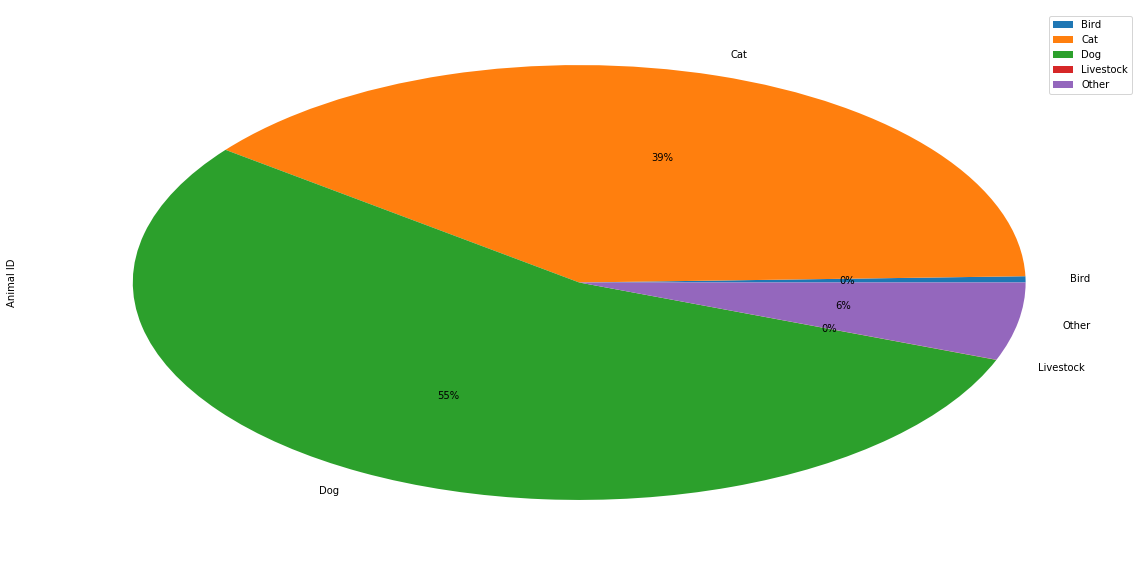

In [34]:
breed_df.plot.pie(figsize=(20,10), subplots=True,autopct='%1.0f%%')

In [30]:
color_df = fixed_df.groupby(['Color']).agg({'Animal ID':'count'})
color_df

,Animal ID
Color,
Agouti,12
Agouti/Brown Tabby,1
Agouti/Gray,1
Agouti/White,2
Apricot,57
Apricot/Brown,3
Apricot/Tricolor,2
Apricot/White,10
Black,7181


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1328a0ac8>],
      dtype=object)

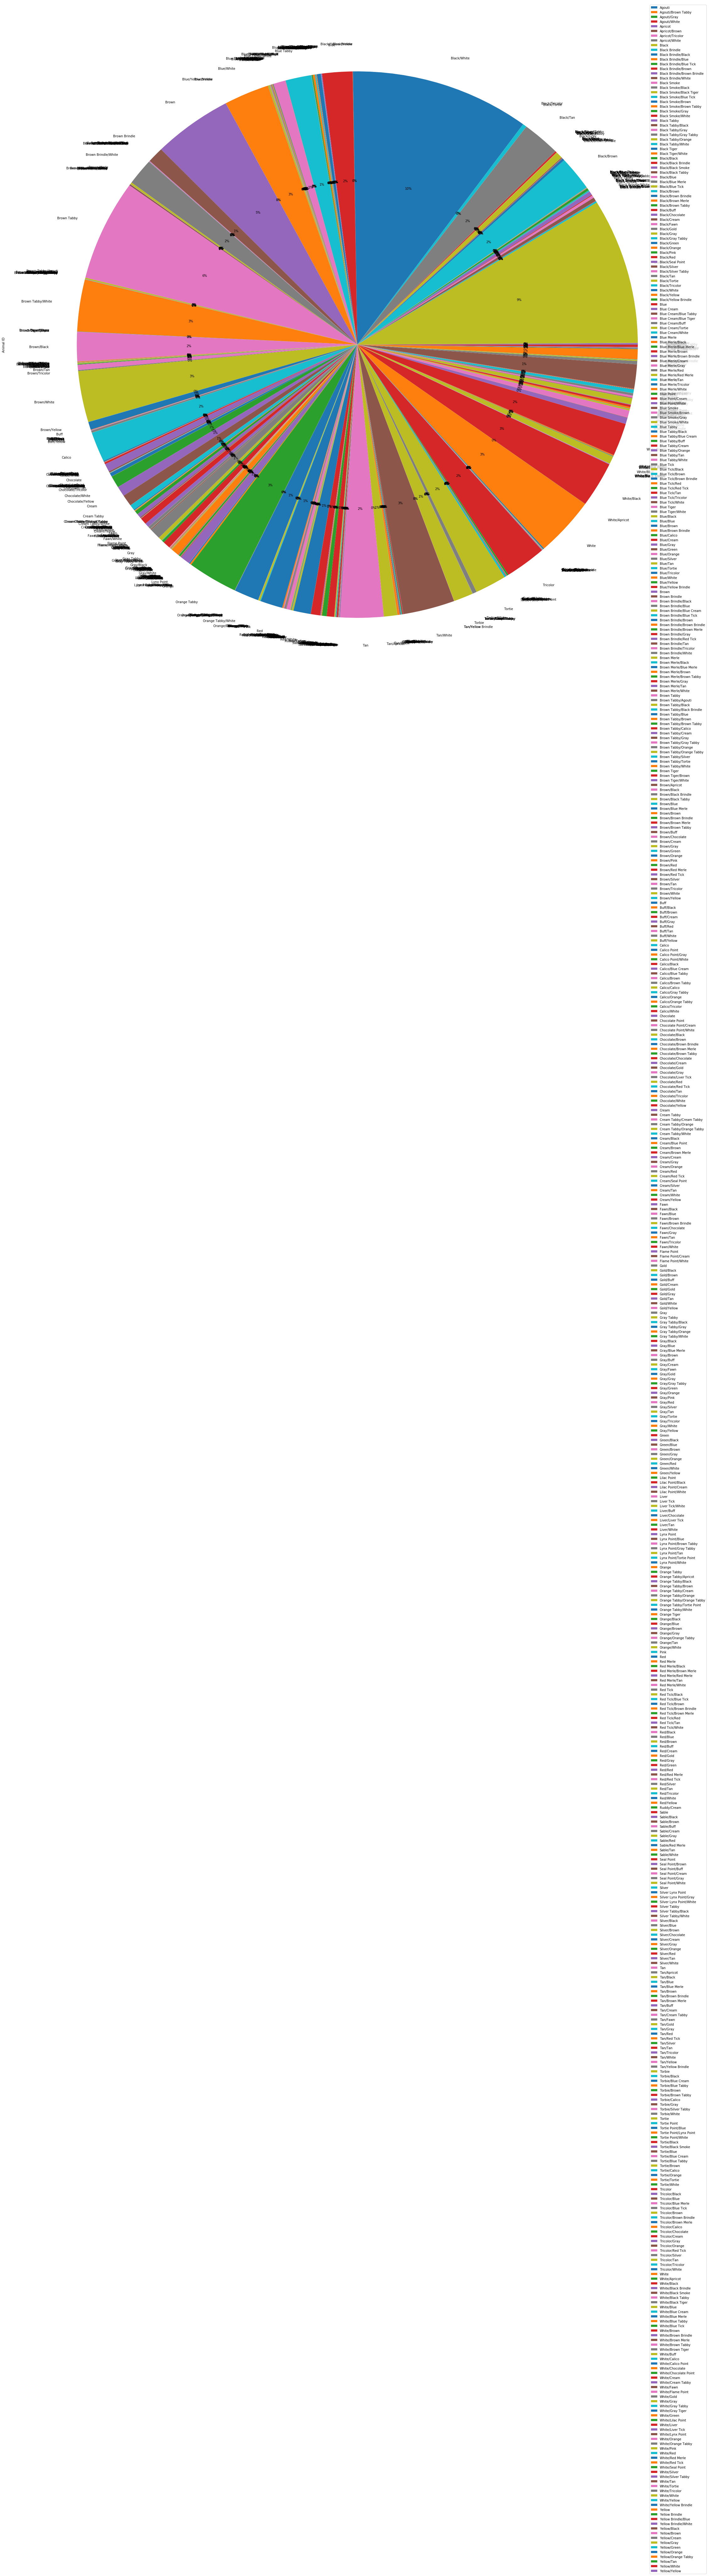

In [36]:
color_df.plot.pie(figsize=(40,40), subplots=True,autopct='%1.0f%%')

Text(0.5,1,'Reasons Animals are Brought In')

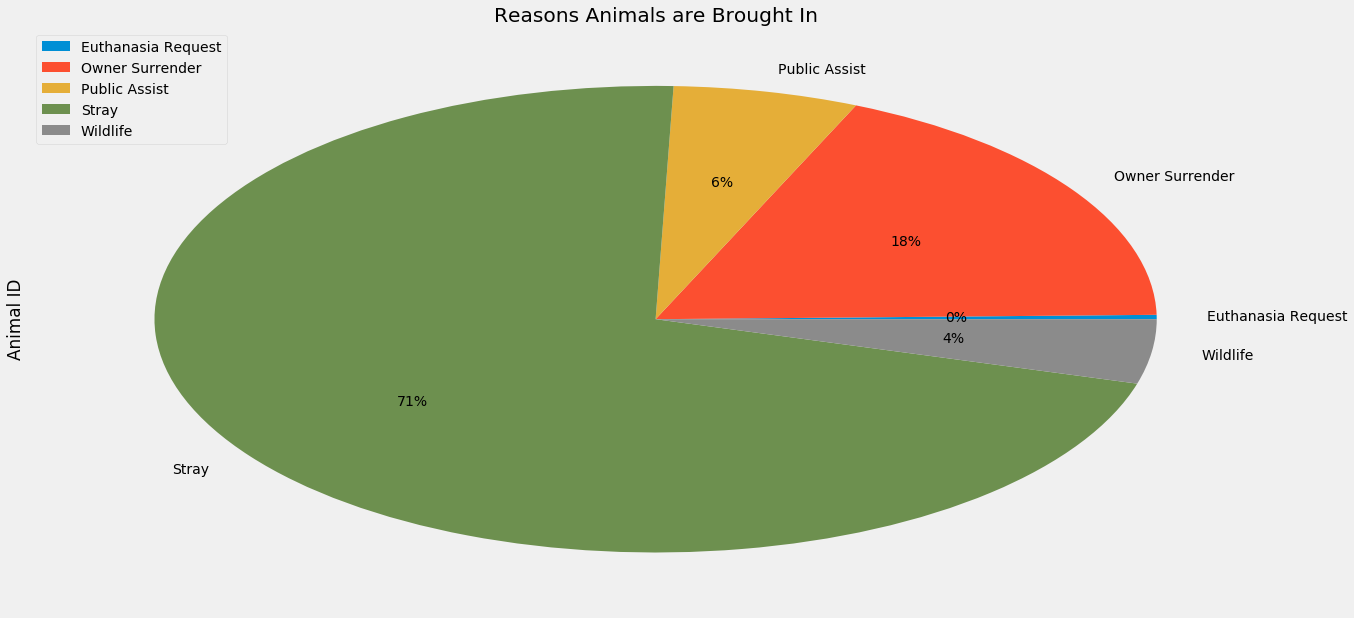

In [53]:
style.use('fivethirtyeight')
intake_df = fixed_df.groupby(['Intake Type']).agg({'Animal ID':'count'})
intake_df.plot.pie(figsize=(20,10), subplots=True,autopct='%1.0f%%')
plt.title("Reasons Animals are Brought In")

Text(0.5,1,'Conditions of Animals Brought In')

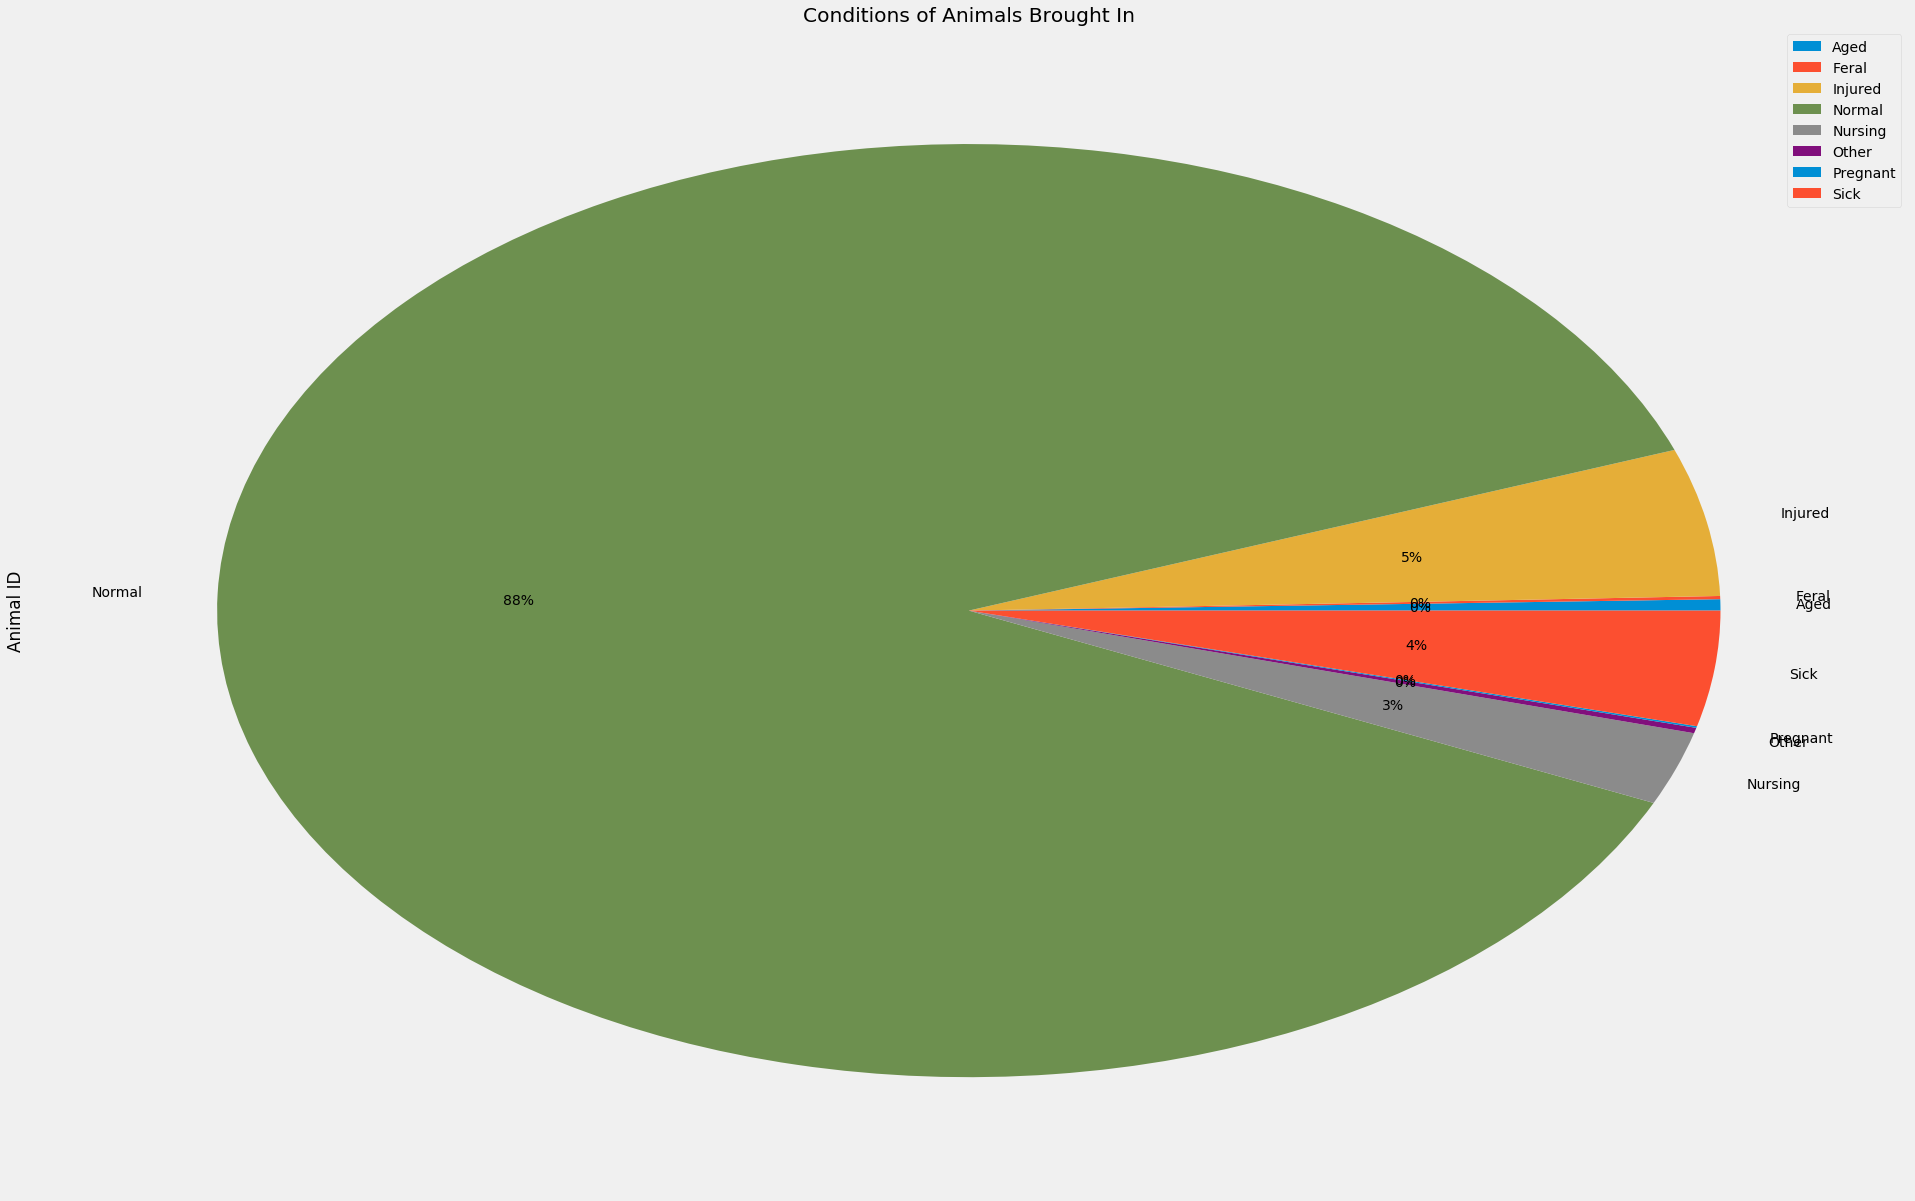

In [50]:
age_df = fixed_df.groupby(['Intake Condition']).agg({'Animal ID':'count'})
age_df.plot.pie(figsize=(30,20), subplots=True,autopct='%1.0f%%')
plt.title("Conditions of Animals Brought In")